In [6]:
pip install pillow matplotlib torchvision

  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached matplotlib-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached torchvision-0.17.2-cp310-cp310-manylinux1_x86_64.whl (6.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 5.0 MB/s eta 0:00:0000:0100:02
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
sys.path.append('/app/src')

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import itertools
from model import Generator, Discriminator
from datamodule import DataModule
from trainer import Trainer

In [7]:
def experiment_CycleGAN():
    generator_A2B = Generator(input_nc=3, output_nc=3)
    generator_B2A = Generator(input_nc=3, output_nc=3)
    discriminator_A = Discriminator(input_nc=3)
    discriminator_B = Discriminator(input_nc=3)
    
    config = {
        'datamodule': DataModule(),
        'generator_A2B': generator_A2B,
        'generator_B2A': generator_B2A,
        'discriminator_A': discriminator_A,
        'discriminator_B': discriminator_B,
        'criterion_GAN': nn.MSELoss(),
        'criterion_cycle': nn.L1Loss(),
        'criterion_identity': nn.L1Loss(),
        'optimizer_G': optim.Adam(itertools.chain(generator_A2B.parameters(), generator_B2A.parameters())),
        'optimizer_D_A': optim.Adam(discriminator_A.parameters()),
        'optimizer_D_B': optim.Adam(discriminator_B.parameters()),
        'max_epoch': 20,
        'output_dir': '../output'
    }
    
    trainer = Trainer(config)
    trainer.fit()

def experiment_UVCGAN():
    pass # implement later

Epoch 1: Training loss: generator = 5.543701039420234; discriminator A = 0.2157676801333825; discriminator B = 0.26809441554877494
Epoch 1: Validation loss: generator = 4.915135164260864; discriminator A = 0.10924306400120258; discriminator B = 0.15735601574182512
Epoch 2: Training loss: generator = 4.593235492706299; discriminator A = 0.17678351995017794; discriminator B = 0.24799197087685268
Epoch 2: Validation loss: generator = 4.167755179405212; discriminator A = 0.17519952729344368; discriminator B = 0.18033660158514978
Epoch 3: Training loss: generator = 4.233463925785489; discriminator A = 0.1859831290774875; discriminator B = 0.23440153832236926
Epoch 3: Validation loss: generator = 4.54142123222351; discriminator A = 0.1655219005048275; discriminator B = 0.25237195909023286
Epoch 4: Training loss: generator = 4.166861884329054; discriminator A = 0.19642686888575553; discriminator B = 0.2240135887927479
Epoch 4: Validation loss: generator = 4.0666810274124146; discriminator A =

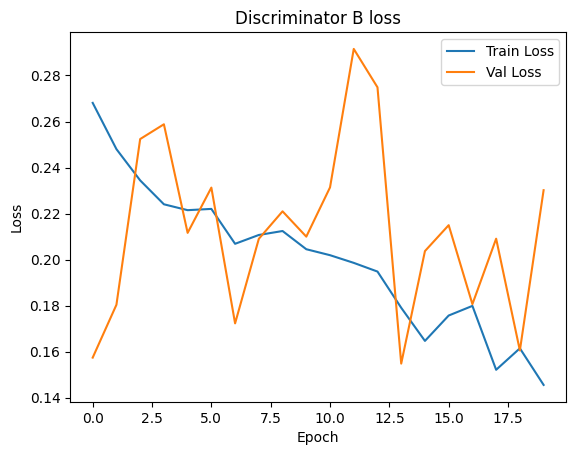

In [8]:
experiment_CycleGAN()
# experiment_UVCGAN()